In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)
df.head()   

Recency (months)  ...  whether he/she donated blood in March 2007
0                 2  ...                                           1
1                 0  ...                                           1
2                 1  ...                                           1
3                 2  ...                                           1
4                 1  ...                                           0

[5 rows x 5 columns]

In [31]:
# Assining columns names
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']
df.head()

Recency  Frequency  Monetary  Time  Donated
0        2         50     12500    98        1
1        0         13      3250    28        1
2        1         16      4000    35        1
3        2         20      5000    45        1
4        1         24      6000    77        0

- Recency - Months since last donation
- Frequency - Total number of donations
- Monetary - Total blood donated in c.c.
- Time - Months since first donation
- Donated -Target variable - donated or not doneted

In [32]:
x = df[['Recency', 'Frequency', 'Monetary', 'Time']]
y = df['Donated']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x

Recency  Frequency  Monetary  Time
0          2         50     12500    98
1          0         13      3250    28
2          1         16      4000    35
3          2         20      5000    45
4          1         24      6000    77
..       ...        ...       ...   ...
743       23          2       500    38
744       21          2       500    52
745       23          3       750    62
746       39          1       250    39
747       72          1       250    72

[748 rows x 4 columns]

In [35]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated, Length: 748, dtype: int64

In [38]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, random_state=42)

clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [39]:
y_pred = clf.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.78


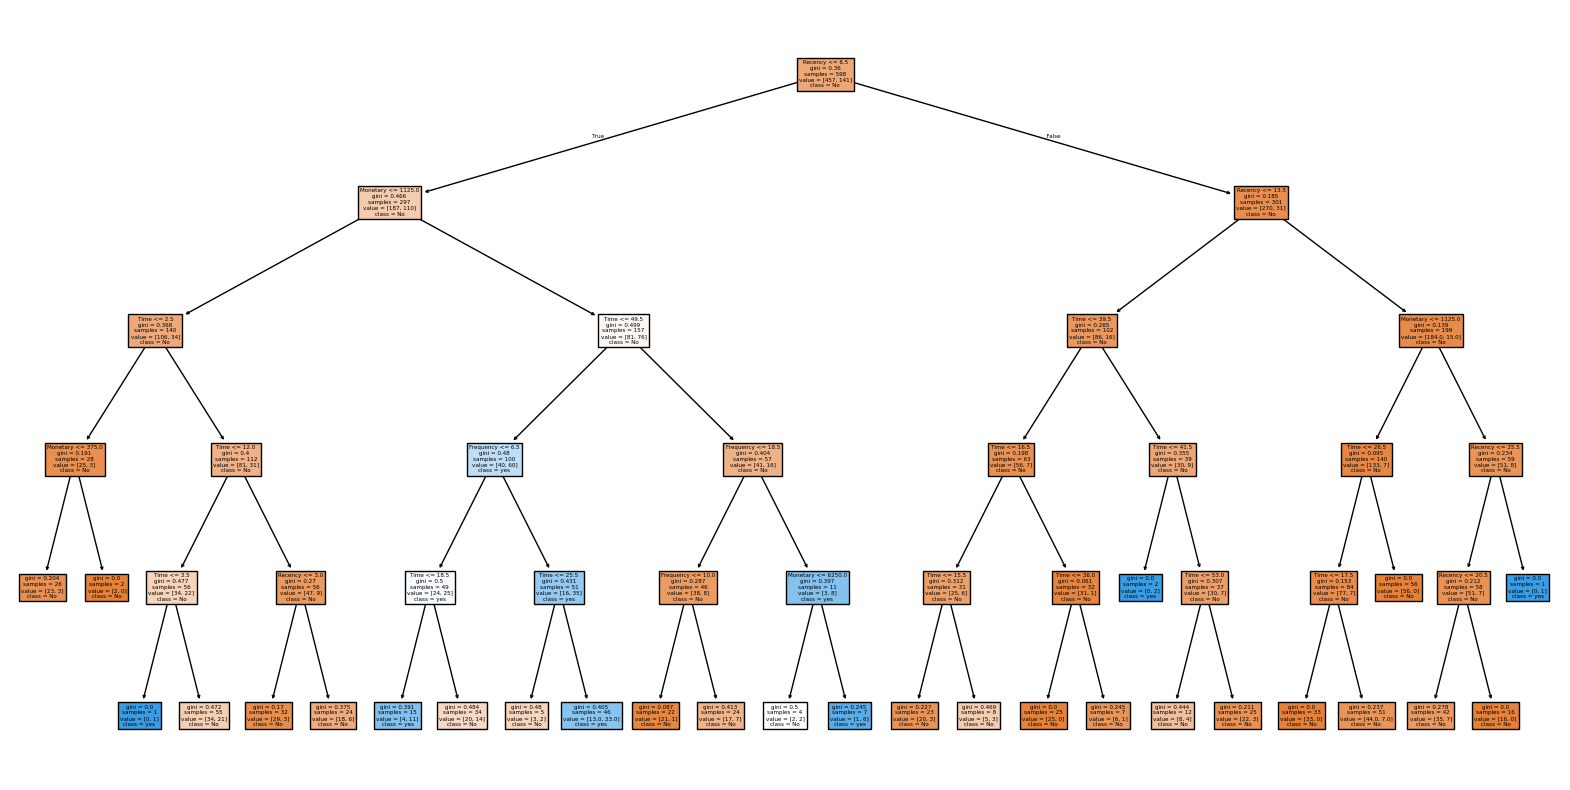

In [41]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=['No','yes'])
plt.show() 